## Prepping to run F4 for PCA-identified Clusters
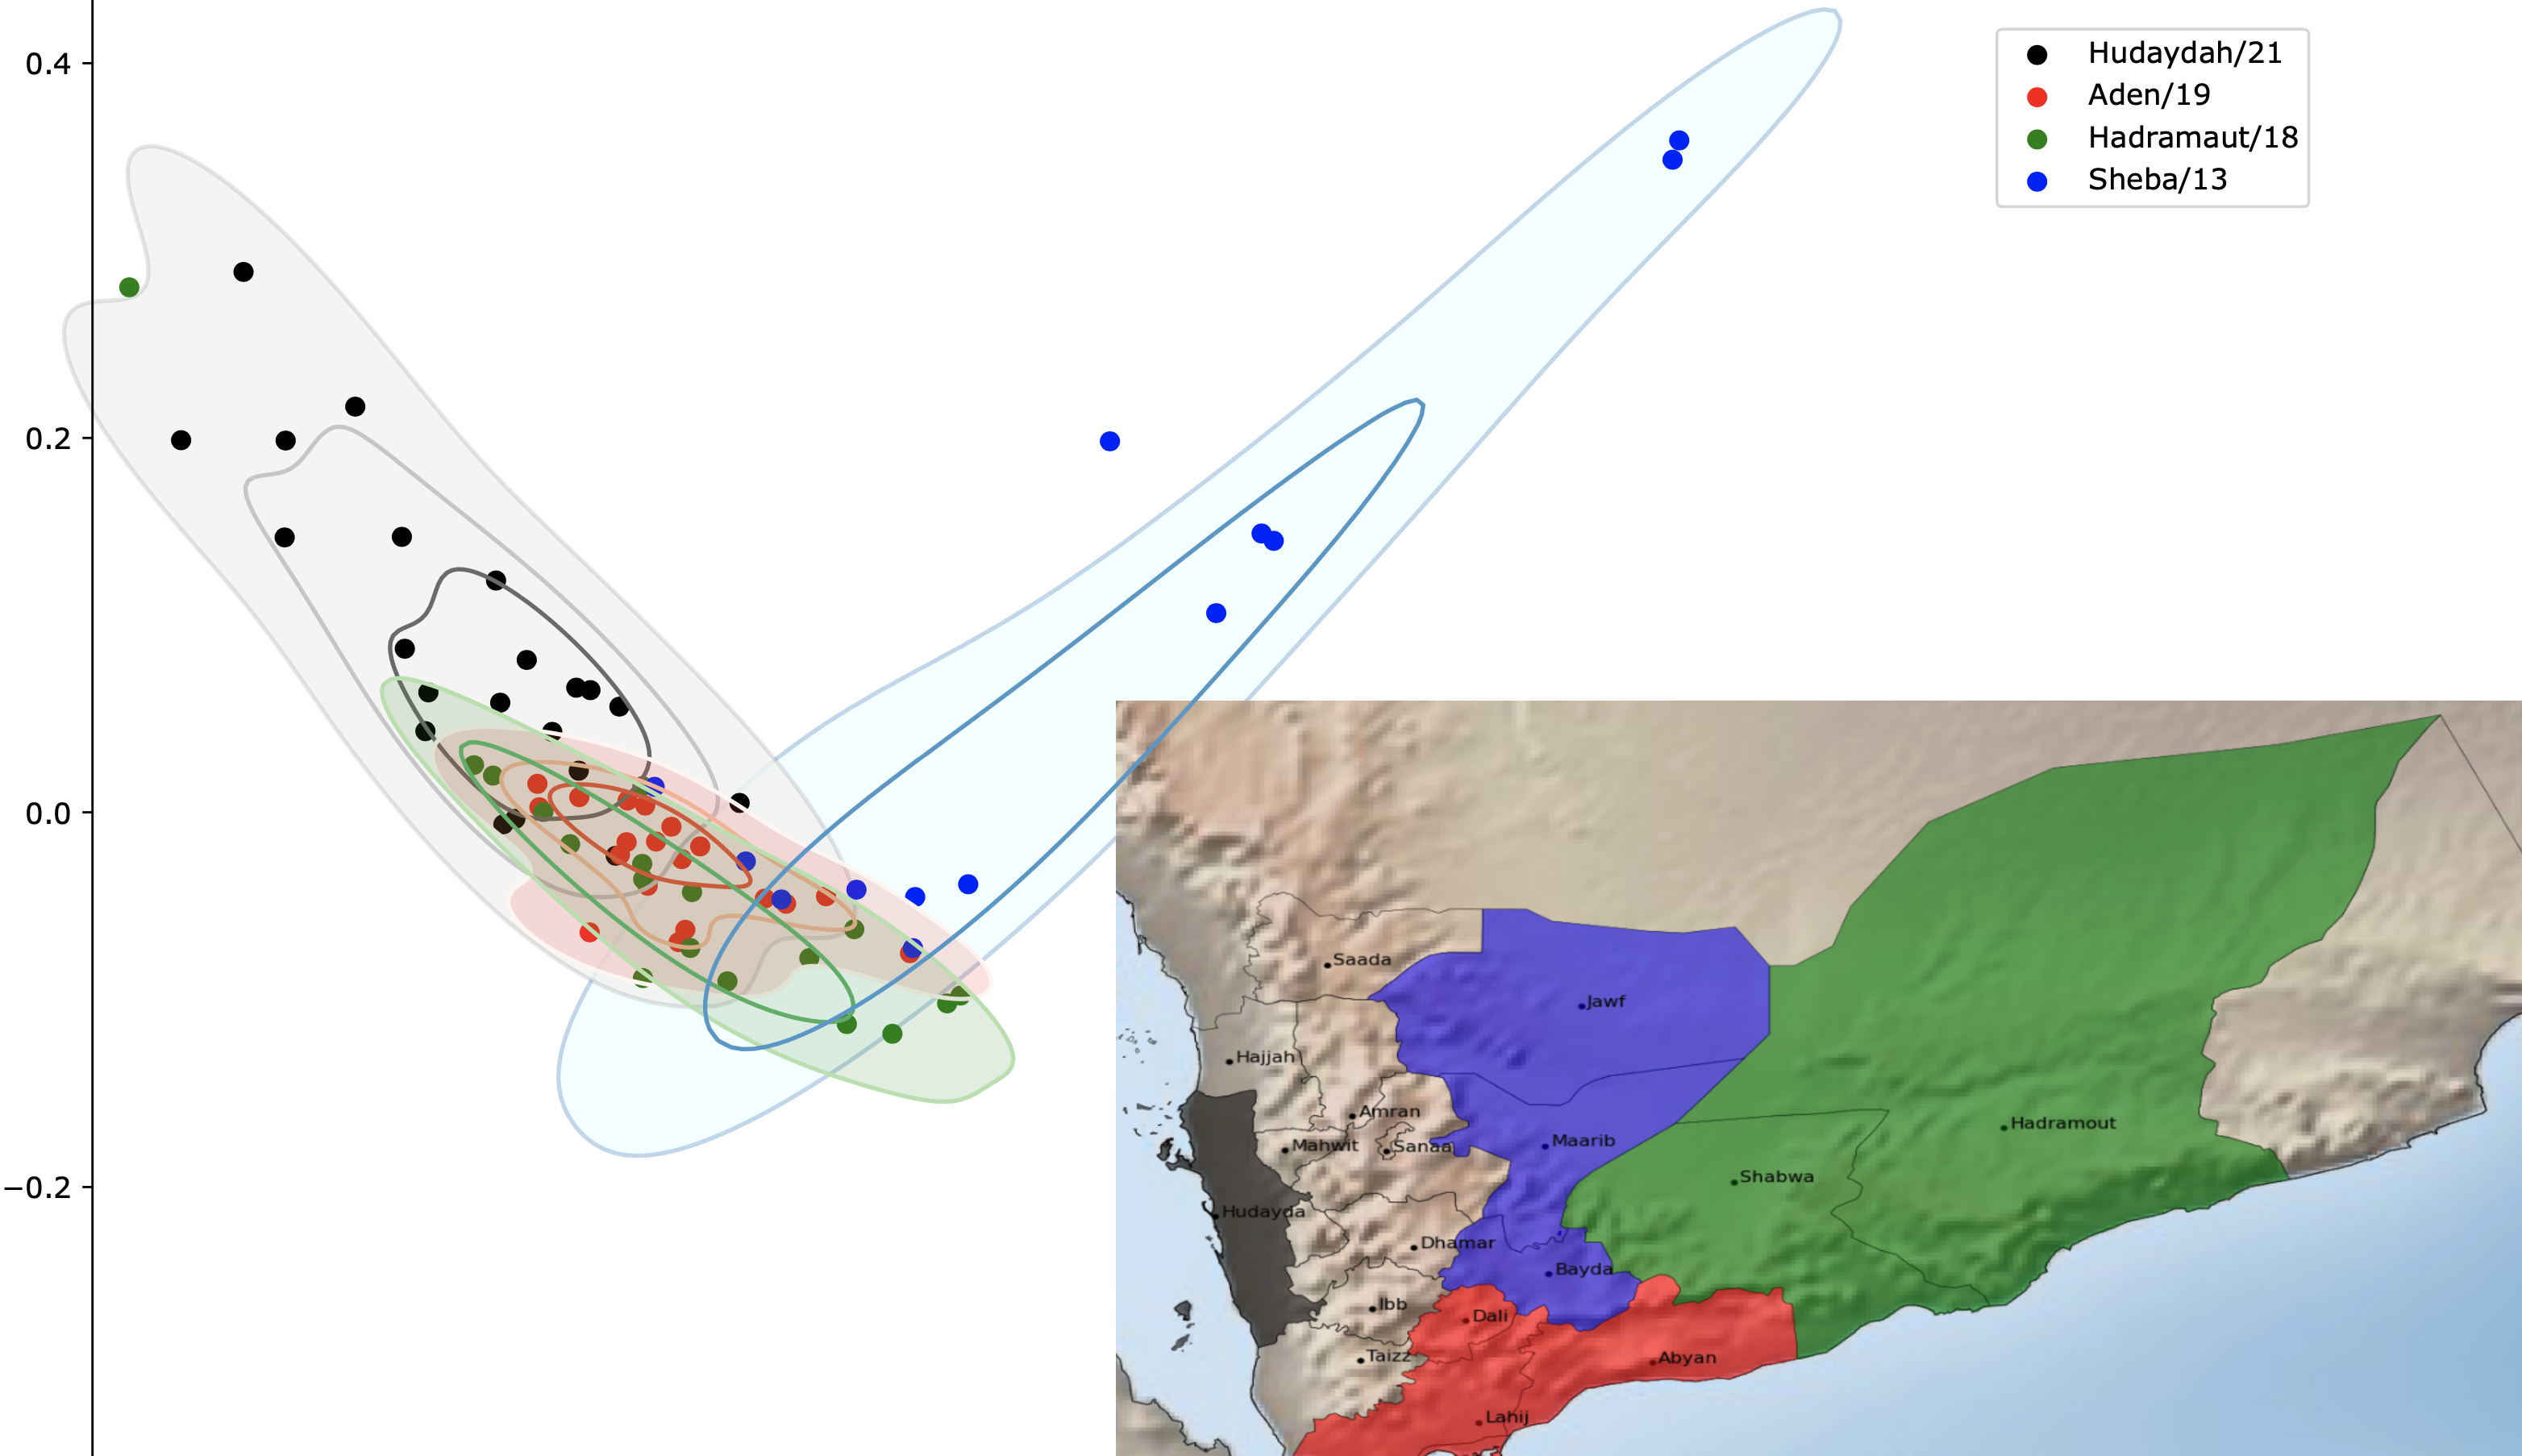

In [1]:
import pandas as pd
import numpy as np
import re
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_1981564/3712574102.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
df = pd.read_csv("../Metadata/3577stdy_manifest_3450_190315.csv.gz", skiprows=8, sep=',', skip_blank_lines=True)
df1 = df.dropna(subset=['SUPPLIER SAMPLE NAME'])
regions = [re.findall('\D+', sup)[0] for sup in df1['SUPPLIER SAMPLE NAME']]
df1.loc[:,"region"] = regions
df1.head()
df1.region.value_counts()

/tmp/ipykernel_1981564/3416783503.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:,"region"] = regions


Rsa      48
Empty    40
Hdr      25
Ibb      25
Tiz      24
Shb      10
Haj      10
Amr      10
Mrb      10
San      10
Jwf      10
Lahj     10
Mhw      10
Sad      10
Abyn     10
Dhm      10
Dal       9
Byd       7
Name: region, dtype: int64

In [3]:
districtDict = {'Sad': 'Azal', 'Amr': 'Azal', 'San': 'Azal', 'Dhm': 'Azal',
                'Mhw': 'Tahamh', 'Haj': 'Tahamh',
                'Hdr': 'Hadramaut', 'Shb': 'Hadramaut',
                'Ibb': 'Aljanad', 'Tiz': 'Aljanad',
                'Jwf': 'Sheba','Mrb': 'Sheba','Byd': 'Sheba',
                'Dal': 'Aden','Lahj': 'Aden', 'Abyn': 'Aden', 'Rsa': 'Hudaydah'}
df1['district'] = df1.region.apply(lambda x: districtDict.get(x))

/tmp/ipykernel_1981564/1134761937.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['district'] = df1.region.apply(lambda x: districtDict.get(x))


In [4]:
df1.head()

,SANGER PLATE ID,WELL,SANGER SAMPLE ID,SUPPLIER SAMPLE NAME,COHORT,VOLUME (ul),CONC. (ng/ul),GENDER,COUNTRY OF ORIGIN,GEOGRAPHICAL REGION,...,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,region,district
0,DN393548T,A1,3577STDY6068360,Dal1,NaN,20.0,100.0,Male,Yemen,Arabian Peninsula,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dal,Aden
1,DN393548T,B1,3577STDY6068361,Ibb15,NaN,20.0,100.0,Male,Yemen,Arabian Peninsula,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ibb,Aljanad
2,DN393548T,C1,3577STDY6068362,Rsa18,NaN,20.0,100.0,Male,Yemen,Arabian Peninsula,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rsa,Hudaydah
3,DN393548T,D1,3577STDY6068363,Rsa35,NaN,20.0,100.0,Male,Yemen,Arabian Peninsula,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rsa,Hudaydah
4,DN393548T,E1,3577STDY6068364,Rsa47,NaN,20.0,100.0,Male,Yemen,Arabian Peninsula,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rsa,Hudaydah


In [5]:
outliers = [line.strip() for line in open("../AdmixTools_HO_mind0.3_geno_0.2/outliers_0000.txt")]
outliers[:3]
df1['outlier'] = df1['SANGER SAMPLE ID'].isin(outliers)
df1

/tmp/ipykernel_1981564/1204847923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['outlier'] = df1['SANGER SAMPLE ID'].isin(outliers)


,SANGER PLATE ID,WELL,SANGER SAMPLE ID,SUPPLIER SAMPLE NAME,COHORT,VOLUME (ul),CONC. (ng/ul),GENDER,COUNTRY OF ORIGIN,GEOGRAPHICAL REGION,...,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,region,district,outlier
0,DN393548T,A1,3577STDY6068360,Dal1,NaN,20.0,100.0,Male,Yemen,Arabian Peninsula,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dal,Aden,False
1,DN393548T,B1,3577STDY6068361,Ibb15,NaN,20.0,100.0,Male,Yemen,Arabian Peninsula,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ibb,Aljanad,False
2,DN393548T,C1,3577STDY6068362,Rsa18,NaN,20.0,100.0,Male,Yemen,Arabian Peninsula,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rsa,Hudaydah,False
3,DN393548T,D1,3577STDY6068363,Rsa35,NaN,20.0,100.0,Male,Yemen,Arabian Peninsula,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rsa,Hudaydah,False
4,DN393548T,E1,3577STDY6068364,Rsa47,NaN,20.0,100.0,Male,Yemen,Arabian Peninsula,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rsa,Hudaydah,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,DN393550N,D12,3577STDY6068643,Tiz15,NaN,20.0,100.0,Male,Yemen,Arabian Peninsula,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tiz,Aljanad,False
284,DN393550N,E12,3577STDY6068644,Empty,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Empty,None,False
285,DN393550N,F12,3577STDY6068645,Empty,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Empty,None,False
286,DN393550N,G12,3577STDY6068646,Empty,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Empty,None,False


In [6]:
!pwd

/home/ahenschel/Dropbox/Yemen/YemenGenomeAnalysis/Notebooks


In [7]:
def districtName(row):
    if row['outlier']:
        return f"{row['district']}_outlier"
    return row['district']

In [8]:
import os
famfile = '/home/ahenschel/Dropbox/Yemen/YemenGenomeAnalysis/AdmixTools_HO_mind0.01_geno_0.05/yemen_reichHO_mind0.01_geno_0.05.LD.QC.fam'
fambak = famfile + '_bako'
#os.system(f'mv {famfile} {fambak}')

In [9]:
fam = pd.read_csv(fambak, sep=' ',header=None)
yemenSamples = set(df1['SANGER SAMPLE ID'])

In [10]:
popIds = []
for i,row in fam.iterrows():
    iid = row[1]
    if iid.startswith('urn:wtsi:'): iid = iid.split('_')[-1]
    if iid in yemenSamples:
        row = df1[df1['SANGER SAMPLE ID']==iid].iloc[0]
        popIds.append(districtName(row))
    else:
        popIds.append(row[0])
fam[0] = popIds
fam.to_csv(famfile, header=False, index=False, sep=' ')

In [11]:
fam.head()

,0,1,2,3,4,5
0,Malawi_Yao,MAL-005,0,0,1,1
1,Malawi_Chewa,MAL-012,0,0,1,1
2,Malawi_Chewa,MAL-014,0,0,1,1
3,Malawi_Chewa,MAL-018,0,0,1,1
4,Malawi_Chewa,MAL-019,0,0,1,1


In [14]:
!grep "" $famfile |cut -f1 -d' '|sort |uniq -c | sort 

    106 Han
    102 GWD.SG
     92 Tibetan
     87 TSI.SG
     81 ESN.SG
     79 ITU.SG
     76 STU.SG
     76 PJL.SG
     75 CEU.SG
     73 KHV.SG
     72 CDX.SG
     69 Yoruba
     67 MSL.SG
     65 BEB.SG
     63 Russian
     63 CHB.SG
     61 GIH.SG
     60 IBS.SG
     60 ACB.SG
     54 PEL.SG
     53 Spanish
     53 LWK.SG
     52 YRI.SG
     50 Turkish
     49 GBR.SG
     49 French
     43 JPT.SG
     41 CLM.SG
     40 CHS.SG
     39 PUR.SG
     38 Palestinian
     36 Druze
     35 Iranian
     31 Tajik
     31 Mordovian
     31 FIN.SG
     31 Bashkir
     30 Druze.SDG
     30 Adygei
     28 Nganasan
     28 Japanese
     28 Aljanad
     27 Sardinian
     26 Palestinian.SDG
     26 Basque
     25 Buryat
     25 BedouinA
     24 Uzbek
     24 Ulchi
     24 Tubalar
     24 Ignore_Yoruba(relative)
     23 Sardinian.SDG
     22 MXL.SG
     21 Mozabite
     21 Hudaydah
     21 Georgian
     21 ASW.SG
     20 Yakut
     20 Tuvinian
     20 Selkup
     20 Qiang
     20 Mongol
     20 Ma

In [ ]:
famfile

In [ ]:
# continue in R-studio, admixAnalysis.r